In [115]:
import getDays

todayInfo = getDays.getToday()
yesterdayInfo = getDays.getYesterday()
tomorrowInfo = getDays.getTomorrow()

month, month_num, date, year = todayInfo[0], todayInfo[1], todayInfo[2], todayInfo[3]
yesterday = yesterdayInfo[2]
yesterday = int(yesterday)
month_num = int(month_num)
nextDay = tomorrowInfo[2]
nextDay = int(nextDay)
date = int(date)

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import datetime
from datetime import datetime
import sqlalchemy
import mysql.connector
import sqlite3
import getDays
import pymysql as dbapi

#
# First the Tempest F6 table
#

QUERY = """SELECT * FROM davisF6 
           WHERE month = %s""" % (month_num)


db = dbapi.connect(host='3.135.162.69',user='chuckwx',passwd='jfr716!!00', database = 'davisf6')

cur = db.cursor()
cur.execute(QUERY)
records = cur.fetchall()

#
# Now the Davis F6 table
#

QUERY1 = """SELECT * FROM tempestF6 
           WHERE month = %s""" % (month_num)


db = dbapi.connect(host='3.135.162.69',user='chuckwx',passwd='jfr716!!00', database = 'tempestf6')

cur = db.cursor()
cur.execute(QUERY1)
records1 = cur.fetchall()

Davis
Tempest


/var/folders/m3/83tjf6dx2d591wslk5wm2wdh0000gn/T/ipykernel_84847/4288506877.py:68: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



FileNotFoundError: [Errno 2] No such file or directory: '/var/www/html/000/newRcomp.png'

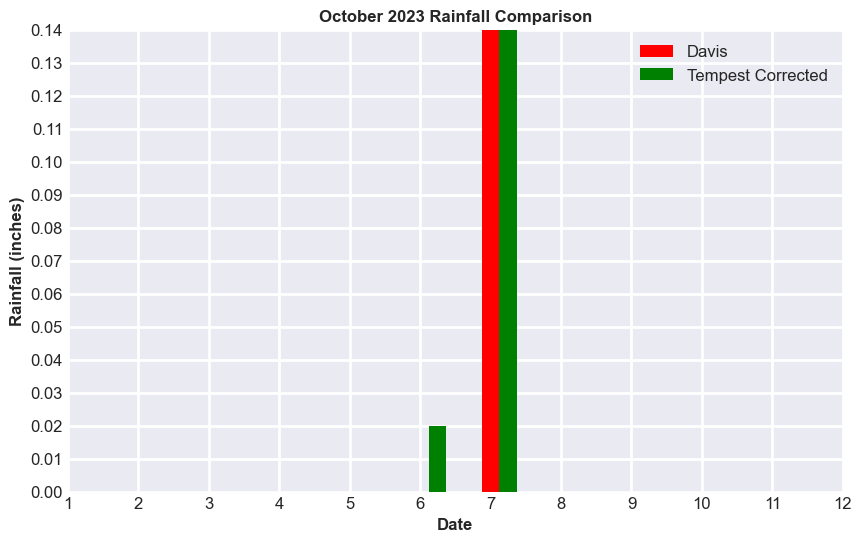

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import plotly.express as px
import plotly.graph_objs as go

sta = ['Davis', 'Tempest']

for qwe in sta:
    print(qwe)
    
    #
    # Dump the data into a pandas DataFrame
    #

    if qwe == 'Davis':
        df = pd.DataFrame(records, columns = ['index', 'Year', 'Month', 'Date', 'High', 'Low', 'Rainfall', 'Max_Dew_Point'])
        df = df.drop(df.columns[[0,4,5,7]], axis = 1)
        df['Date'] = df['Date'].astype(int)
        df['Rainfall'] = df['Rainfall'].astype(float)
        r1 = df['Rainfall']
        
        
    else:
        df = pd.DataFrame(records1, columns = ['index', 'Year', 'Month', 'Date', 'High', 'Low', 'totR', 'corR', 'Lightning1_5', 'Lightning6_10'])
        df = df.drop(df.columns[[0,4,5,6,8,9]], axis = 1) 
        df['Date'] = df['Date'].astype(int)
        df['corR'] = df['corR'].astype(float)
        r2 = df['corR']      


x_indexes = np.arange(1, date)
height = 0.0
width = 0.25 


plt.style.use('seaborn-darkgrid')
    
path1 = '/var/www/html/000/'
plt.figure(figsize= (10,6))
plt.locator_params(axis = 'x', nbins = date)
plt.xlim(1, date)
plt.xticks(fontsize=12)
plt.xlabel('Date', fontsize=12, fontweight ='bold')

plt.yticks(fontsize=12)
plt.ylabel('Rainfall (inches)', fontsize=12, fontweight ='bold')
plt.locator_params(axis='y', nbins=20)

plt.title(f'{month} {year} Rainfall Comparison', fontsize=12, fontweight ='bold')
plt.grid(axis = "y", linewidth = 2.0, color = 'white')
plt.grid(axis = "x", linewidth = 2.0, color = 'white')
    
plt.bar(df['Date'], r1, color ='red', width = 0.25, label = "Davis")
plt.bar((df['Date'] + width), r2, color ='green', width = 0.25, label = "Tempest Corrected")
plt.autoscale(enable = True, axis = 'y', tight = True)
    
plt.legend(fontsize = 12)
plt.savefig(f'{path1}newRcomp')  